In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!pip install -q keras


In [3]:

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

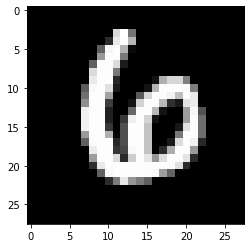

In [4]:
import random
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( x_train[i,0:].reshape((28,28)) ) # reshape and plot the image to get image

plt.imshow( x_train[i,0:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image


In [0]:
x_train= np.array(x_train, dtype = 'float32')
X_train = x_train[:,0:]/255

x_test = np.array(x_test, dtype = 'float32')
X_test = x_test[:,0:]/255


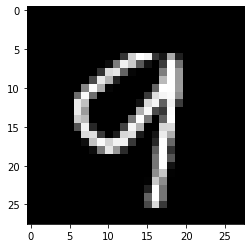

In [6]:
import random
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( x_train[i,0:].reshape((28,28)) ) # reshape and plot the image to get image

plt.imshow( x_train[i,0:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image

In [0]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [8]:
!pip install tensorflow==1.14.0

In [0]:
!pip install -q keras

In [10]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation = 'relu')) #3 is no of channels ,64 is dim of 2d array in each channel
#32 is fliters(feature detector), 3,3 is row and col of feature detector
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2))) #without these get large features then very high compattue but  not loose performance and info

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu')) #already know size, already have so no need I/P
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [11]:
classifier.fit(X_train,y_train, batch_size = 64, verbose = 1,epochs = 10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
60000/60000 [==============================] - 41s 690us/step - loss: 0.2087 - acc: 0.9384
Epoch 2/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0610 - acc: 0.9816
Epoch 3/10
60000/60000 [==============================] - 41s 681us/step - loss: 0.0434 - acc: 0.9868
Epoch 4/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0346 - acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0274 - acc: 0.9914
Epoch 6/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0231 - acc: 0.9924
Epoch 7/10
60000/60000 [==============================] - 41s 681us/step - loss: 0.0191 - acc: 0.9939
Epoch 8/10
60000/60000 [==============================] - 41s 680us/step - loss: 0.0157 - acc: 0.9948
Epoch 9/10
60000/60000 [==============================] - 41s 680us/step - loss: 0.0133 -

In [0]:
y_pred = classifier.predict_classes(X_test) #directly give class

In [13]:
y_pred 

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [15]:
cm

array([[ 976,    1,    0,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1132,    1,    0,    0,    0,    1,    0,    1,    0],
       [   1,    1, 1028,    0,    1,    0,    0,    1,    0,    0],
       [   0,    1,    3,  997,    0,    7,    0,    0,    2,    0],
       [   0,    0,    0,    0,  975,    0,    1,    0,    0,    6],
       [   1,    0,    0,    3,    0,  886,    1,    0,    0,    1],
       [   3,    2,    1,    0,    3,    4,  944,    0,    1,    0],
       [   0,    7,    9,    2,    1,    0,    0,  999,    0,   10],
       [   3,    0,    7,    2,    0,    3,    1,    0,  951,    7],
       [   0,    1,    0,    0,    6,    7,    0,    1,    0,  994]])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9882